# Mathematik für Biologiestudierende

Wintersemester 2025/26

09.12.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen heute

* t-Tests allgemein
* t-Test für verbundene Stichproben
* Gestapeltes und gestapeltes Tabellenformat
* t-Test für unverbundene Stichproben

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# t-Test für Erwartungswerte

## Verbundene und unverbundene Stichproben

* Zwei Versuchsreihen liefern Messergebnisse.  Der Test soll entscheiden, ob sich diese Ergebnisse signifikant unterscheiden.

* *Unverbundene Stichproben:* Die Messerergebnisse werden an verschiedenen Populationen gewonnen.

  Beispiel: 9 Maisfelder werden mit einem Bodenbakterium behandelt, 10 weitere bleiben unbehandelt.  Bei allen wird der Befall mit Maiszünsler bestimmt.

* *Verbundene Stichproben:* Beide Messungen werden an derselben Population durchgeführt.

  Beispiel: Bei 10 Patienten mit Bluthochdruck wird der Blutdruck vor und nach einer Therapie bestimmt.

* verbundene Daten werden auch als messwiederholte Daten bezeichnet (engl. "repeated measure")

## Teststatistik für verbundene Stichproben

* Ein Versuch wird $n$-mal durchgeführt
* Ein Parameter wird geändert 
* Der Versuch wird mit dem geänderten Parameter mit *demselben* Kollektiv wiederholt
* Die Messergebnisse werden verglichen 

## t-Test zum Vergleich zweier Erwartungswerte bei verbundenen Stichproben

* Gegeben sind Zufallsvariable $X_1, \dots, X_n$ und $Y_1, \dots, Y_n$
* Verteilungsvoraussetzungen:
  * Alle $X_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_1$ und unbekannter Varianz $\sigma^2$
  * Alle $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und unbekannter Varianz $\sigma^2$
  * Die beiden Varianzen müssen also gleich sein
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werden

* $x_j$ und $ y_j$ seien Realisierungen (d.h. die Daten)
* $z_j = x_j - y_j$ seien die Differenzen

* Bestimme arithmetischen Mittelwert
$$      \overline z = \frac1n \sum_{j=1}^n z_j   $$

* und Stichprobenstreuung
$$      s = \sqrt{ \frac1{n-1} \sum_{j=1}^n (z_j - \overline z)^2 } $$

### Teststastik

* Die Teststatistik ist
$$        t = \frac{\overline z}s \cdot \sqrt{n}  $$

* Die Teststatistik wird mit einem Quantil der $t$-Verteilung verglichen 

# Die t-Verteilung

* Wenn kein Unterschied zwischen $X_j$ und $Y_j$ besteht, dann ist die Teststatistik für große $n$ annähernd standardnormalverteilt
* Die tatsächliche Verteilung der Teststatistik ist die $t$-Verteilung mit $(n-1)$ Freiheitsgraden
* Die $t$-Verteilung mit $f$ Freiheitsgraden ist in scipy implementiert als `stats.t(f)`

In [2]:
P = stats.t(30)

Die Verteilungsfunktion heißt wie immer `P.cdf`

In [3]:
P.cdf(0)

0.5

Das Quantil ist implementiert als `P.ppf`

In [4]:
P.ppf(0.95)

1.6972608865939571

Zum Vergleich

In [5]:
Phi = stats.norm()

In [6]:
Phi.ppf(0.95)

1.6448536269514722

* Die Quantile der t-Verteilungen sind größer als die entsprechenden Quantile der Standardnormalverteilung

* Das führt dazu, dass es schwerer ist, die Nullhypothese abzulehnen

* Das ist der Preis, den wir dafür zahlen müssen, dass wir die Varianz nicht wissen, sondern aus den Daten schätzen müssen

* Der Unterschied ist umso größer, je kleiner der Stichprobenumfang ist

## Freiheitsgrade
  
Heuristisch: 

* $n$ Versuche, um den Parameter $\overline z$ zu schätzen 
* Jeder andere Parameter, der hilfsweise geschätzt werden muss, verringert die Zahl der Freiheitsgrade um 1
* Beim $t$-Test für verbundene Stichproben muss $s$ hilfsweise geschätzt werden
* Daher gibt es $(n-1)$ Freiheitsgrade
* Die Schätzung von $s$ verringert die Genauigkeit.  Daher sind die Quantile der $t$-Verteilungen größer als die der Standardnormalverteilung.

## Ein- und zweiseitige Tests

* Tests können ein- oder zweiseitig sein
* Es sind $\mu_1$ und $ \mu_2 $ die unbekannten wahren Erwartungswerte der beiden Stichproben
* Bei zweiseitigen Tests ist die Nullhypothese von der Form $H_0 =  \{\mu_1 = \mu_2\}$
* Beim einseitigen unteren Test ist die Nullhypothese von der Form $H_0 = \{\mu_1 \ge \mu_2\}$, d.h. die Alternativhypothese ist $\mu_1 < \mu_2$
* Beim einseitigen oberen Test ist die Nullhypothese von der Form $H_0 = \{\mu_1 \le \mu_2\}$, d.h. die Alternativhypothese ist $\mu_1 > \mu_2$

* Entscheidung:
  * $H_0 = \{\mu_1=\mu_2\} $: Die Nullhypothese $H_0$ wird abgelehnt, wenn $\left|t\right| > t_{n-1,\,1-\alpha/2}$
  * $H_0 = \{\mu_1\le\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t > t_{n-1,\,1-\alpha}$
  * $H_0 = \{\mu_1\ge\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t < -t_{n-1,\,1-\alpha}$

#### Beispiel Blutdrucksenker

* 10 Blutdruckpatienten erhalten eine Woche lang das Medikament und eine Woche lang das Placebo.  Der Blutdruck am Ende der jeweiligen Behandlung wird notiert.  Zwischen beiden Behandlungen vergehen zwei Wochen mit Standard-Therapie.
* Für den $j$-ten Patienten 

\begin{align*}
      X_j &= \text{Blutdruck unter Placebo} \\
      Y_j &= \text{Blutdruck unter Medikament} \\
      Z_j &= X_j - Y_j
\end{align*}

* Beim Blutdrucksenker interessiert nur, ob der Blutdruck tatsächlich sinkt
* Ein einseitiger Test ist angemessen
* $\mu_1 =$ Blutdruck unter Placebo, $\mu_2 =$ Blutdruck unter Medikament
* Die Nullhypothese ist $ H_0 : \mu_1 \le \mu_2 $, also ein oberer Test
* Das Signifikanzniveau ist $\alpha = 0.05$
* Die Zahl der Freiheitsgrade ist 9

Das benötigte Quantil ist

In [7]:
P = stats.t(9)

In [8]:
P.ppf(0.95)

1.8331129326536335

#### Beispieldaten

In [9]:
blutdruck = pd.DataFrame()
blutdruck['Placebo'] = [168, 184, 172, 173, 150, 155, 163, 164, 151, 146]
blutdruck['Verum'] = [176, 145, 150, 163, 136, 168, 164, 139, 145, 112]
blutdruck

,Placebo,Verum
0,168,176
1,184,145
2,172,150
3,173,163
4,150,136
5,155,168
6,163,164
7,164,139
8,151,145
9,146,112


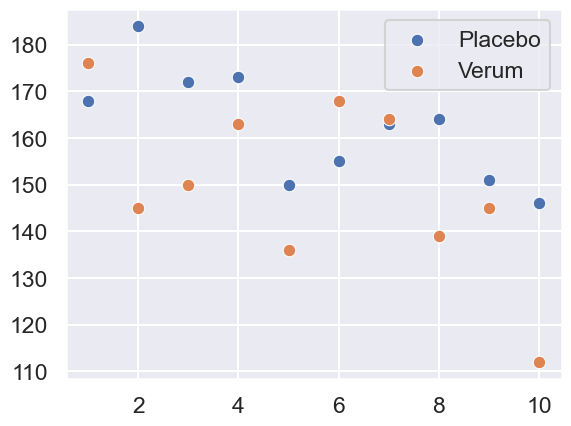

In [10]:
ax = sns.scatterplot(data=blutdruck, x = np.arange(1, 11), y='Placebo', label='Placebo')
sns.scatterplot(data=blutdruck, x = np.arange(1, 11), y='Verum', label='Verum', ax=ax)
ax.set_ylabel("");

In [11]:
blutdruck['z'] = blutdruck.Placebo - blutdruck.Verum
blutdruck.z.describe()

count    10.000000
mean     12.800000
std      17.364075
min     -13.000000
25%       0.750000
50%      12.000000
75%      24.250000
max      39.000000
Name: z, dtype: float64

In [12]:
t = 12.8 / 17.3641 * np.sqrt(10)
t

2.3310827540820003

Das ist größer als das Quantil:  Die Nullhypothese kann abgelehnt werden.  Die Wirksamkeit des Blutdrucksenkers ist zu dem angegebenen Signifikanzniveau nachgewiesen.

## Automatische Auswertung mit stats

In [13]:
stats.ttest_rel(blutdruck.Placebo, blutdruck.Verum, alternative="greater")

TtestResult(statistic=2.331086069657434, pvalue=0.02233380789226441, df=9)

In [14]:
res = stats.ttest_rel(blutdruck.Placebo, blutdruck.Verum, alternative="greater")
res.statistic  #  Die Teststatistik

2.331086069657434

In [15]:
res.pvalue   # Der p-Wert

0.02233380789226441

Der p-Wert ist kleiner als das Signifikanzniveau $\alpha=0.05$, also kann $H_0$ abgelehnt werden

In [16]:
res.df    #  Die Anzahl der Freiheitsgrade

9

## Vergleich mit einem Referenzwert

Das ist der Spezialfall, bei dem der zweite Datensatz für alle Einträge gleich dem Referenzwert ist

Beispiel

* Ein Betrieb leitet Abwasser ein.  Die Konzentration eines bestimmten Schadstoffes darf 0.08% nicht überschreiten
* An fünf Messstellen werden insgesamt 80 Proben entnommen
* Wenn zum Signifikanzniveau $\alpha=0.01$ nachgewiesen ist, dass der Schadstoffgehalt über dem Referenzwert 0.08% liegt, dann wird der Betrieb vom Ordnungsamt geschlossen

In [17]:
u = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"

In [18]:
schadstoffe = pd.read_csv(u, index_col=0)

In [19]:
schadstoffe.head()

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152


Als zweites Argument von `stats.ttest_rel` wird nun der Referenzwert angegeben

In [20]:
res = stats.ttest_rel(schadstoffe.Konzentration, 0.0008, alternative="greater")
res

TtestResult(statistic=2.768040010585661, pvalue=0.0035114445640696246, df=79)

In [21]:
res.pvalue

0.0035114445640696246

Zum Signifikanzniveau $\alpha=0.01$ ist die Überschreitung der Grenzwerte nachgewiesen

# t-Test für unverbundene Stichproben

* Ein Versuch wird $n_1$-mal durchgeführt
* Ein Parameter wird geändert
* Der Versuch wird mit dem geänderten Parameter $n_2$-mal mit einem anderen Kollektiv wiederholt
* Die Messergebnisse werden verglichen 
* Da die Stichproben unverbunden sind, ist $n_1 \ne n_2$ möglich 

## t-Test zum Vergleich zweier Erwartungswerte bei unverbundenen Stichproben

* Gegeben sind Zufallsvariable $X_1, \dots, X_{n_1}$ und $Y_1, \dots, Y_{n_2}$
* Verteilungsvoraussetzungen 
  * Die $X_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_1$ und unbekannter Varianz $\sigma^2$
  * Die $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und unbekannter Varianz $\sigma^2$
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werden

* $x_j$ und $y_j$ seien Realisierungen

* Bestimme arithmetische Mittelwerte 
$$      \overline x = \frac1{n_1} \sum_{j=1}^{n_1} x_j 
\text{ und } \overline y = \frac1{n_2} \sum_{j=1}^{n_2} y_j $$

* und Stichprobenstreuungen
$$  s_x = \sqrt{ \frac1{n_1-1} \sum_{j=1}^{n_1} (x_j - \overline x)^2 } \text{ und } 
        s_y = \sqrt{ \frac1{n_2-1} \sum_{j=1}^{n_2} (y_j - \overline y)^2 }  $$

## Standardabweichung der gepoolten Stichproben

* Bestimme die *Standardabweichung der gepoolten Stichproben*

$$       s_p = \sqrt{ \frac{(n_1-1) \cdot s_x^2 + (n_2 - 1) \cdot
          s_y^2}{n_1 + n_2 - 2} }  $$

### Teststatistik

Die Teststatistik ist

$$      t = \frac{\overline x - \overline y}{s_p} \sqrt{\frac{n_1
          \cdot n_2}{n_1 + n_2}}  $$

### Entscheidungsregel

* Bestimme zugehörige Quantile der $t$-Verteilung    

\begin{align*}
      &t_{n_1+n_2-2,\,1-\alpha/2} && \text{beim zweiseitigen Test} \\
      &t_{n_1+n_2-2,\,1-\alpha} && \text{bei einem einseitigen Test}
\end{align*}

* Entscheidungsregel
  * $H_0 = \{\mu_1=\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $\left|t\right| > t_{n_1+n_2-2,\,1-\alpha/2}$
  * $H_0 = \{\mu_1\le\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t > t_{n_1+n_2-2,\,1-\alpha}$
  * $H_0 = \{\mu_1\ge\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t < -t_{n_1+n_2-2,\,1-\alpha}$

#### Beispiel Maiszünsler
    
<img src="bilder/744px-Ostrinia_nubilalis01.jpg" alt="Maiszünsler" width="25%"/>

* Der Maiszünsler soll mit einem Bodenbakterium bekämpft werden
* Die Befallsraten (in Larven pro Quadratmeter) wurden gemessen

* Zum Signifikanzniveau $\alpha = 0.05$ soll nachgewiesen werden, dass der Besatz mit dem Bodenbakterium den Befall mit Larven des Maiszünslers verhindert

* Es handelt sich um einen einseitigen, unverbundenen Test

# Wide-Format und Long-Format

* Long-Format deutsch: "gestapelt"
* Wide-Format deutsch: "ungestapelt"

* bei verbundenen Stichproben verwendet man das ungestapelte Format

Die Tabelle `blutdruck` ist eine Tabelle im ungestapelten Format

In [22]:
blutdruck

,Placebo,Verum,z
0,168,176,-8
1,184,145,39
2,172,150,22
3,173,163,10
4,150,136,14
5,155,168,-13
6,163,164,-1
7,164,139,25
8,151,145,6
9,146,112,34


* dabei sind die Daten der Individuen zeilenweise notiert

* bei unverbundenen Stichproben macht das keinen Sinn, weil für die unterschiedlichen Parameterwerte unterschiedliche Individuen untersucht werden

* die Tabelle enthält stattdessen eine Spalte mit dem Parameterwert

## Aufbau einer Tabelle im gestapelten Format

In [23]:
behandelt = pd.DataFrame()
behandelt['Befall'] = [61 ,  60 , 62 , 58 , 75 , 63 , 52 , 66 , 59]
behandelt['Behandlung'] = 'ja'
behandelt

,Befall,Behandlung
0,61,ja
1,60,ja
2,62,ja
3,58,ja
4,75,ja
5,63,ja
6,52,ja
7,66,ja
8,59,ja


In [24]:
unbehandelt = pd.DataFrame()
unbehandelt['Befall'] = [55 , 69 , 64 , 70 , 75 , 70 , 83 , 69 , 75 , 69]
unbehandelt['Behandlung'] = 'nein'
unbehandelt

,Befall,Behandlung
0,55,nein
1,69,nein
2,64,nein
3,70,nein
4,75,nein
5,70,nein
6,83,nein
7,69,nein
8,75,nein
9,69,nein


In [25]:
mais = pd.concat([behandelt, unbehandelt], ignore_index=True)
mais.head(12)

,Befall,Behandlung
0,61,ja
1,60,ja
2,62,ja
3,58,ja
4,75,ja
5,63,ja
6,52,ja
7,66,ja
8,59,ja
9,55,nein


* `ignore_index=True` erstellt einen neuen Index
* ohne diese Option würden die beiden vorhandenen Indices verwendet; das ergäbe aber keinen gültigen Index

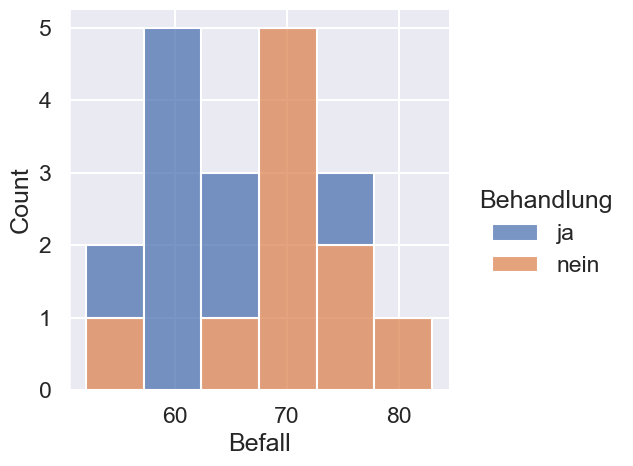

In [26]:
sns.displot(data=mais, x='Befall', hue='Behandlung', multiple='stack');

In [27]:
behandelt.describe()

,Befall
count,9.000000
mean,61.777778
std,6.280481
min,52.000000
25%,59.000000
50%,61.000000
75%,63.000000
max,75.000000


In [28]:
unbehandelt.describe()

,Befall
count,10.000000
mean,69.900000
std,7.324995
min,55.000000
25%,69.000000
50%,69.500000
75%,73.750000
max,83.000000


In [29]:
zaehler = 9*7.325**2 + 8*6.281**2
nenner = 17
std_pool = np.sqrt( zaehler / nenner )
std_pool

6.853544866366173

In [30]:
faktor = 10*9 / (10+9)
faktor

4.7368421052631575

In [31]:
t = (61.778 - 69.9) / std_pool * np.sqrt(faktor)
t

-2.579242516807668

Das ist die Teststatistik

* Wir machen den Test zum Signifikanzniveau $\alpha=0.05$
* Die Zahl der Freiheitsgrade ist 17
* Das benötigte Quantil ist

In [32]:
P = stats.t(17)
P.ppf(0.95)

1.7396067260750672

Es gilt $t < -t_{17,0.95}$, also wird die Nullhypothese abgelehnt

## Auswertung mit `scipy.stats`

In [33]:
stats.ttest_ind(behandelt.Befall, unbehandelt.Befall, alternative="less")

TtestResult(statistic=-2.5793982980797687, pvalue=0.009746177193200247, df=17.0)

Der p-Wert ist 0.01

# Zusammenfassung: t-Tests mit `scipy.stats`

* `stats.ttest_rel(x,y,alternative)` t-Test für verbundene Stichproben (engl: related)
* `stats.ttest_ind(x,y,alternative)` t-Test für unverbundene Stichproben (engl: independent)
* x, y: Daten
* alternative:  entweder `less`, `greater` oder `two-sided`